# Brief Introduction
The objective of this project is to estimate the Hurst Exponent of a given time series in order to determine whether it adheres to Brownian Motion characteristics. The fundamental mathematical concept aiding us in developing this estimator is known as "Self-Similarity."

In essence, we define self-similarity as follows:

_A process $X(t)$ is considered self-similar with a parameter H if, for any $a>0$, the relationship $X(at)=a^HX(t)$ holds true, where the equality sign signifies equivalence in distribution. In the context of a Brownian Motion, the Hurst parameter is consistently 0.5._

When the process $X(t)$ exhibits stationary increments, a fundamental identity that involves moments of the stochastic process can be derived. A specific instance of this, centered on the process **variance**, takes the form: $Var[X(t+a)-X(t)]=a^{2H}Var[X(t+1)-X(t)]$.

In a slight shift of notation, focusing on the standard deviation instead of variance, we get: $\sigma_a=a^H\sigma_1$.

The final step involves constructing an estimator for H, which can be achieved by linearizing the model for application of the Least Squares Method: $log\sigma_a=Hloga+log\sigma_1$.

# Code

In [5]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
print('All packages loaded!')

All packages loaded!


The next step involves importing financial data. 

For illustrative purposes we are going to import Dow Jones data and build 2 datasets. One that uses data from the year 2000 to today. The other which focuses on the financial crises period only (Dec 2007 - Jun 2009). The aim of this project is to prove how the market, during crises periods, deviates tremendously from the Efficient Market Hypothesis, as the Brownian Motion is often used as a model for Efficient Markets.

In [9]:
# Set date and ticker
start_date = '2000-01-01'
end_date = '2023-08-25'  # Use the current date or any other desired end date
dow_ticker = '^DJI'

# Fetch the data using Yahoo Finance
dow_data = yf.download(dow_ticker, start=start_date, end=end_date)

# Extract the 'Close' column which contains the daily closing prices
df = dow_data['Close']

# Print the extracted closing prices
df.head()

[*********************100%***********************]  1 of 1 completed


Date
2000-01-03    11357.509766
2000-01-04    10997.929688
2000-01-05    11122.650391
2000-01-06    11253.259766
2000-01-07    11522.559570
Name: Close, dtype: float64

In [19]:
# Store data from financial crises period in a new dataframe
start_date = '2007-12-01'
end_date = '2009-06-01'

df2 = df.loc[start_date:end_date]
df2.head()

Date
2007-12-03    13314.570312
2007-12-04    13248.730469
2007-12-05    13444.959961
2007-12-06    13619.889648
2007-12-07    13625.580078
Name: Close, dtype: float64

## Estimation Function

In [21]:
def estimate_H_exp(max_lag, time_series, title):
    #choose lag and create and empty vector to store the standard deviations
    lags = range(2, max_lag)
    moments = []

    # compute log returns with all the lags, then store the standard deviations in the empty vector "moments" 
    for lag in lags: 
        returns = np.log(time_series/time_series.shift(lag))
        moments.append(returns.std())
        
    # build our variables of interest: log(lag), log(moment)
    log_lags = np.log(lags)
    log_moment = np.log(moments)

    d = {'log_lags':log_lags, 
         'log_moment':log_moment}
    data = pd.DataFrame(d)

    # estimate H as the slope of a linear fit
    reg = np.polyfit(x=log_lags, y=log_moment, deg=1)

    # plot
    x = np.linspace(0, 5, 100)
    y = reg[0]*x + reg[1]
    plt.figure(figsize=(10, 5))
    plt.title(f"{title}", fontsize=25)
    sns.scatterplot(data=data, x='log_lags', y='log_std', color='blue')
    plt.plot(x, y, color='red', label=f'{round(reg[0], 2)}*x {round(reg[1], 2)}')
    plt.legend(loc='upper left', fontsize=20)
    plt.ylabel('log(standard deviation)', fontsize=15)
    plt.xlabel('log(lag)', fontsize=15)

## Testing

### Under the Full Period

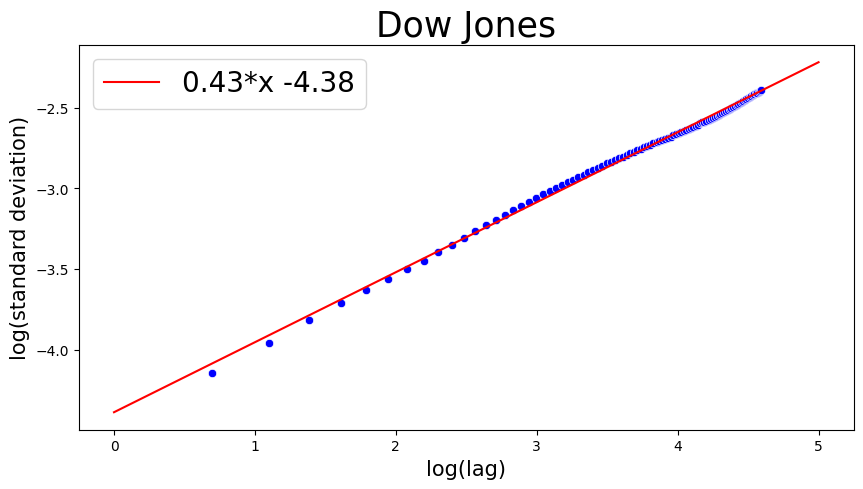

In [22]:
estimate_H_exp(100, df, 'Dow Jones')
# The estimated H is 0.43 and the fit is fairly approximated by a line

### Under the Financial Crisis Period

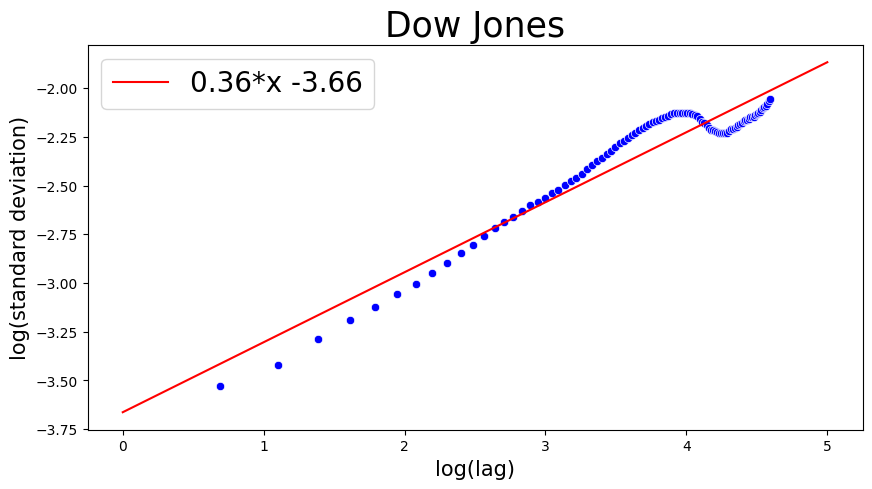

In [26]:
estimate_H_exp(100, df2, 'Dow Jones')
# The estimated H is 0.36 but with a very bad fit, namely very bad robustness of the estimate itself